In [78]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
colors = ['#0FB5AE', '#4046CA', '#F68511', '#DE3D82', '#7E84FA', '#72E06A', '#147AF3', '#7326D3', '#E8C600', '#CB5D00',
          '#008F5D', '#BCE931']
sns.set_style('darkgrid')

In [2]:
train_data = pd.read_csv('./assets/titanic_train.csv')
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


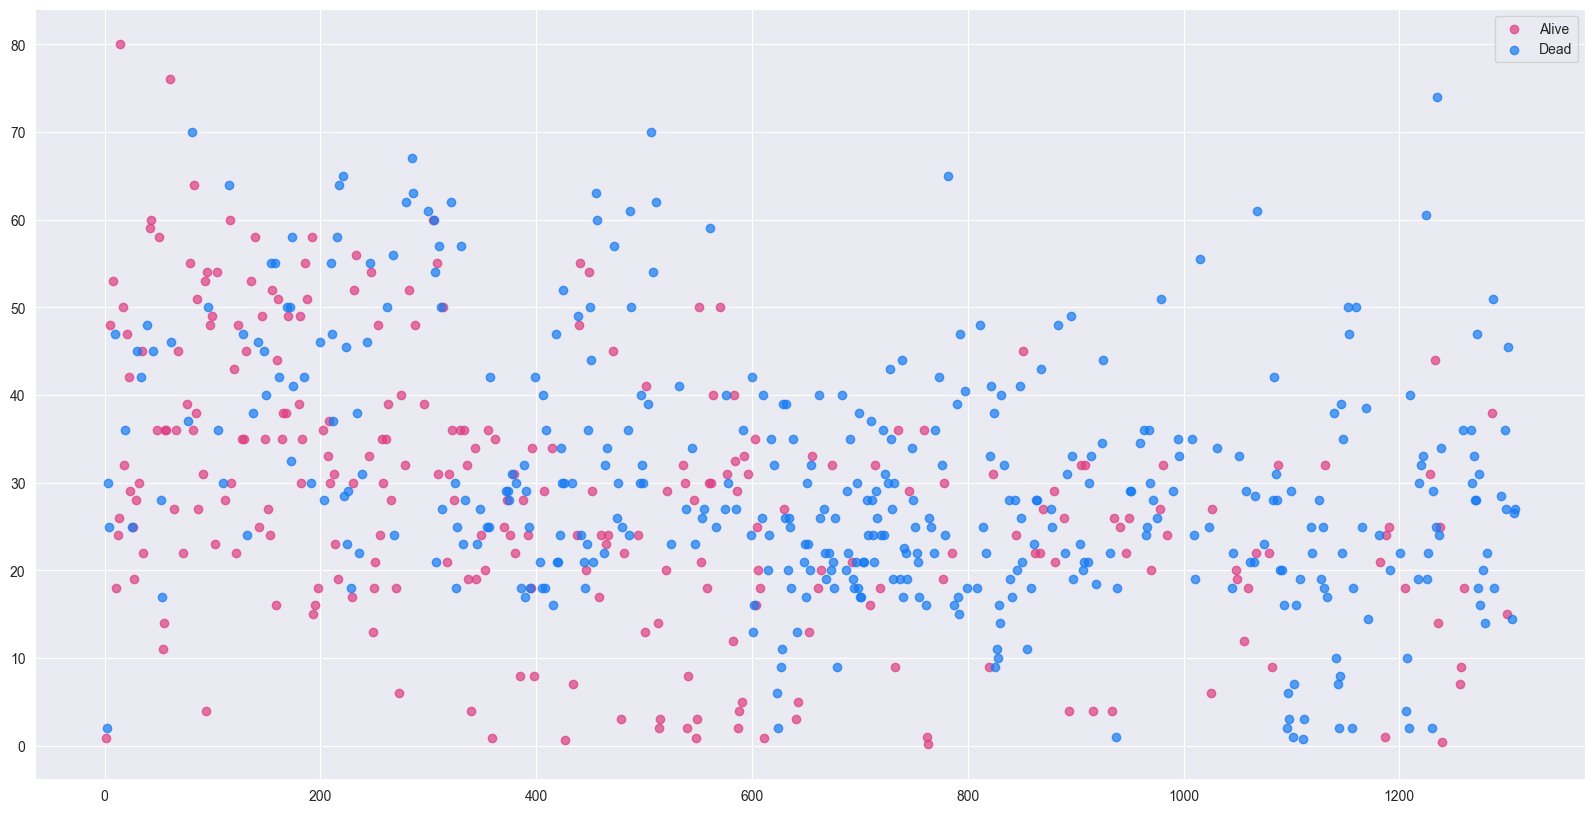

In [37]:
plt.figure(figsize=(20, 10))

plt.scatter(train_data['passenger_id'].loc[train_data['survived'] == 1],
            train_data['age'].loc[train_data['survived'] == 1],
            color=colors[3], alpha=0.7)
plt.scatter(train_data['passenger_id'].loc[train_data['survived'] == 0],
            train_data['age'].loc[train_data['survived'] == 0], color=colors[6], alpha=0.7)

plt.legend(["Alive", "Dead"])

plt.show()

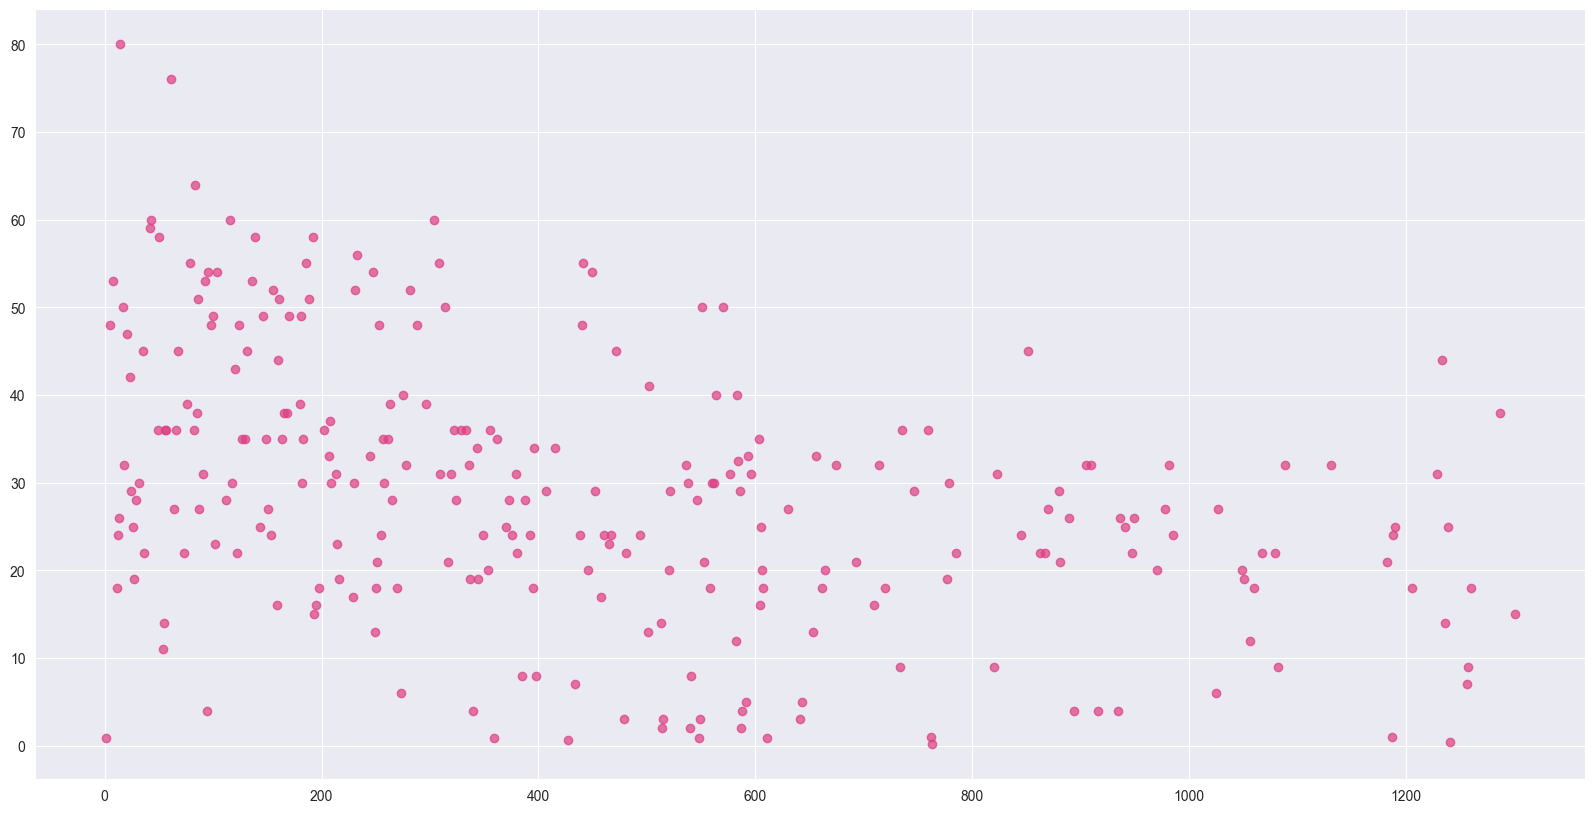

In [40]:
plt.figure(figsize=(20, 10))

for i in range(train_data['passenger_id'].loc[train_data['survived'] == 1]):
    plt.scatter(train_data['passenger_id'].loc[train_data['survived'] == 1],
                train_data['age'].loc[train_data['survived'] == 1],
                color=colors[3], alpha=0.7)

plt.show()

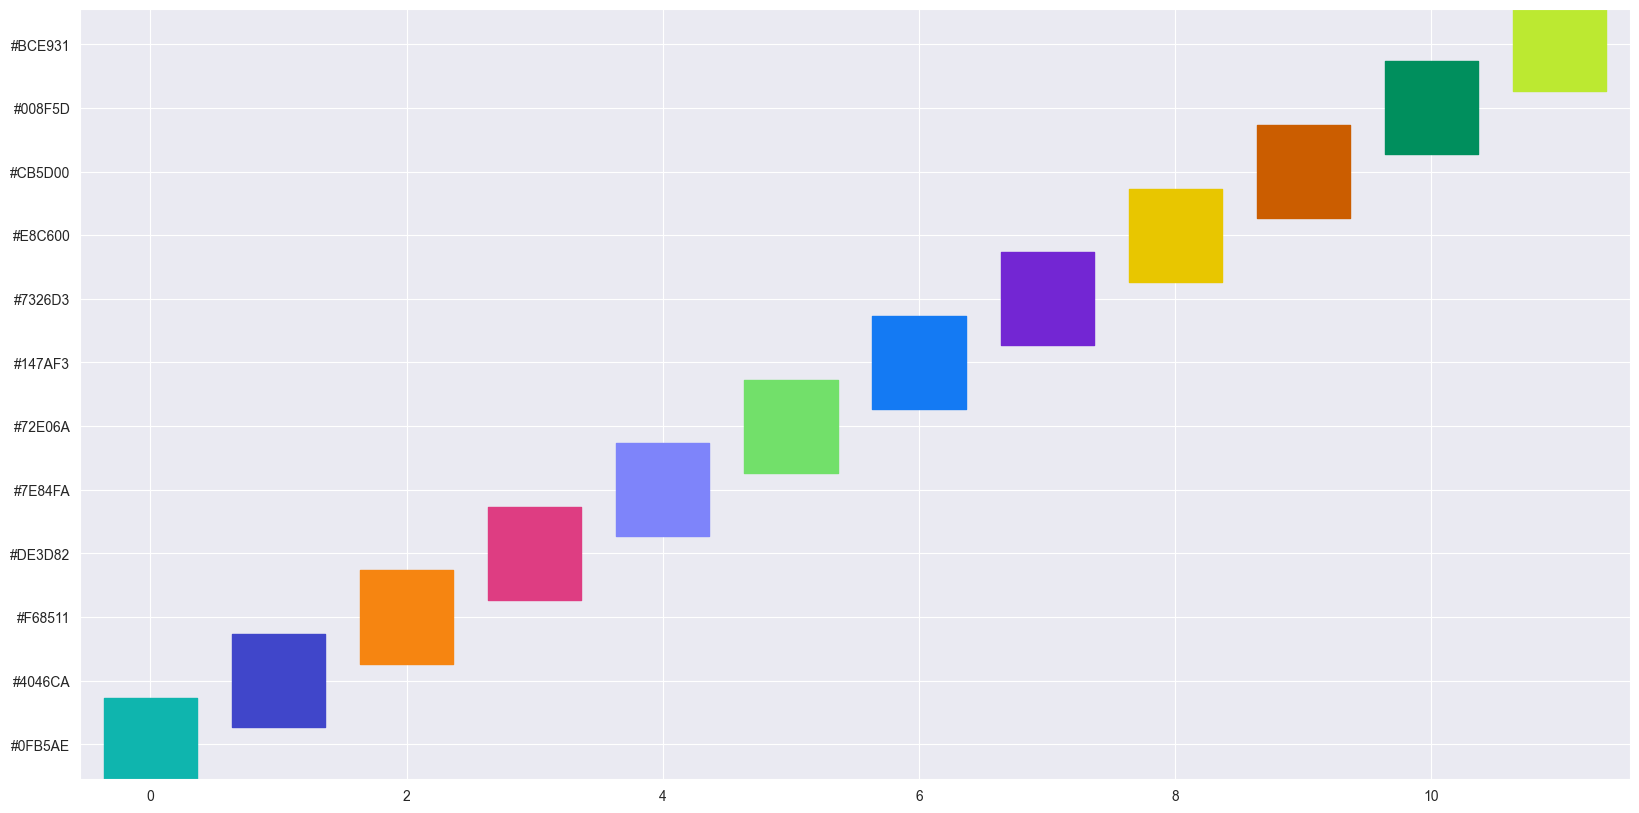

In [76]:
plt.figure(figsize=(20, 10))
plt.scatter(range(12), colors, color=colors, marker='s', s=4500)
plt.show()

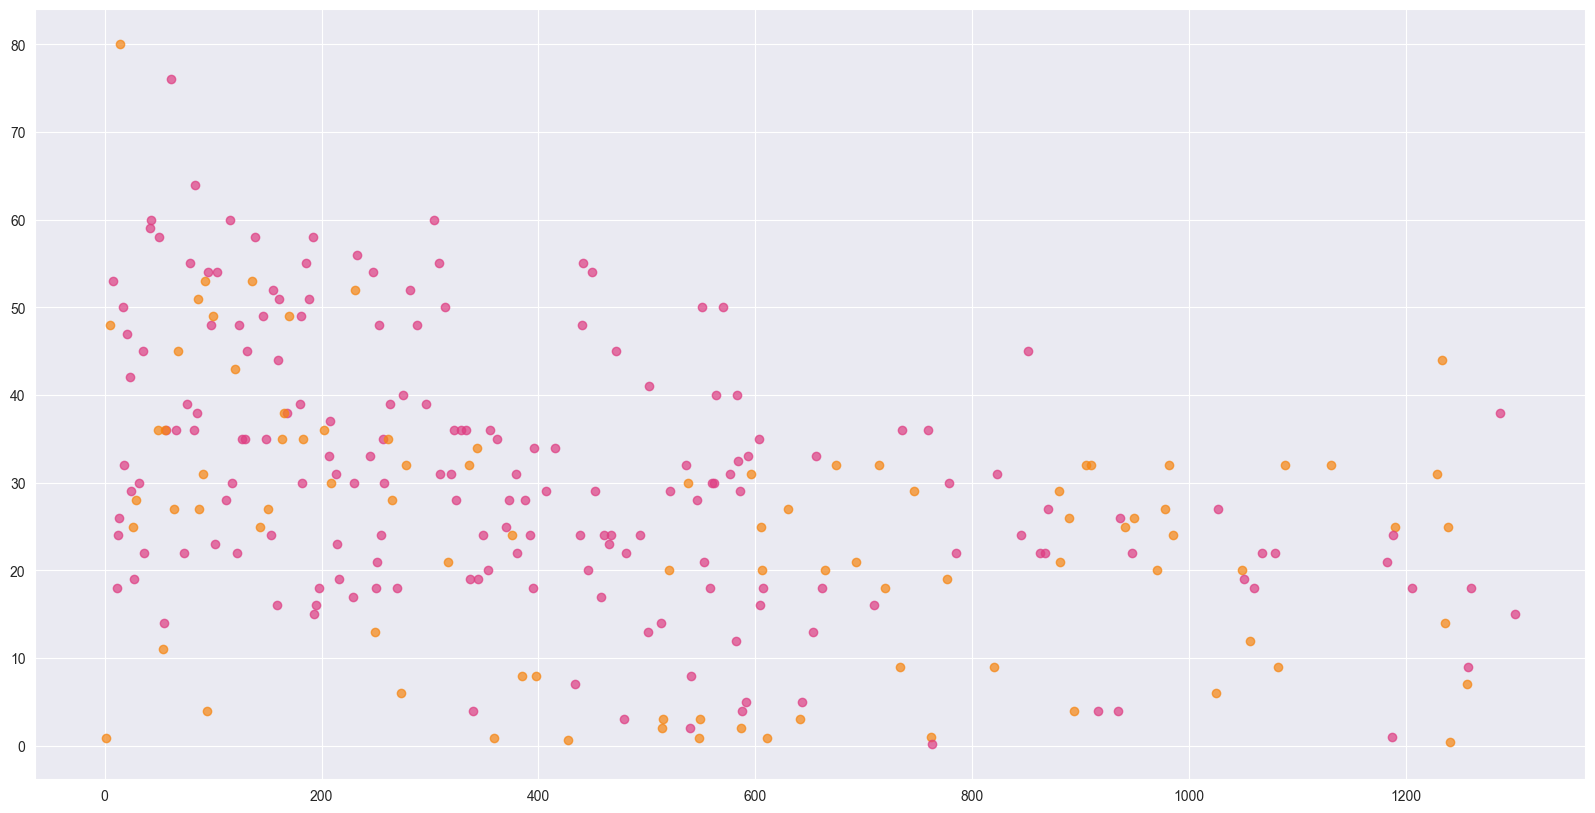

In [58]:
colDict = {
    "male": colors[2],
    "female": colors[3]
}

plt.figure(figsize=(20, 10))

for i in train_data['passenger_id'].loc[train_data['survived'] == 1]:
    gen = train_data['sex'].loc[train_data['passenger_id'] == i]
    # print(colDict[gen.values[0]])
    plt.scatter(i, train_data['age'].loc[train_data['passenger_id'] == i], color=colDict[gen.values[0]], alpha=0.7)

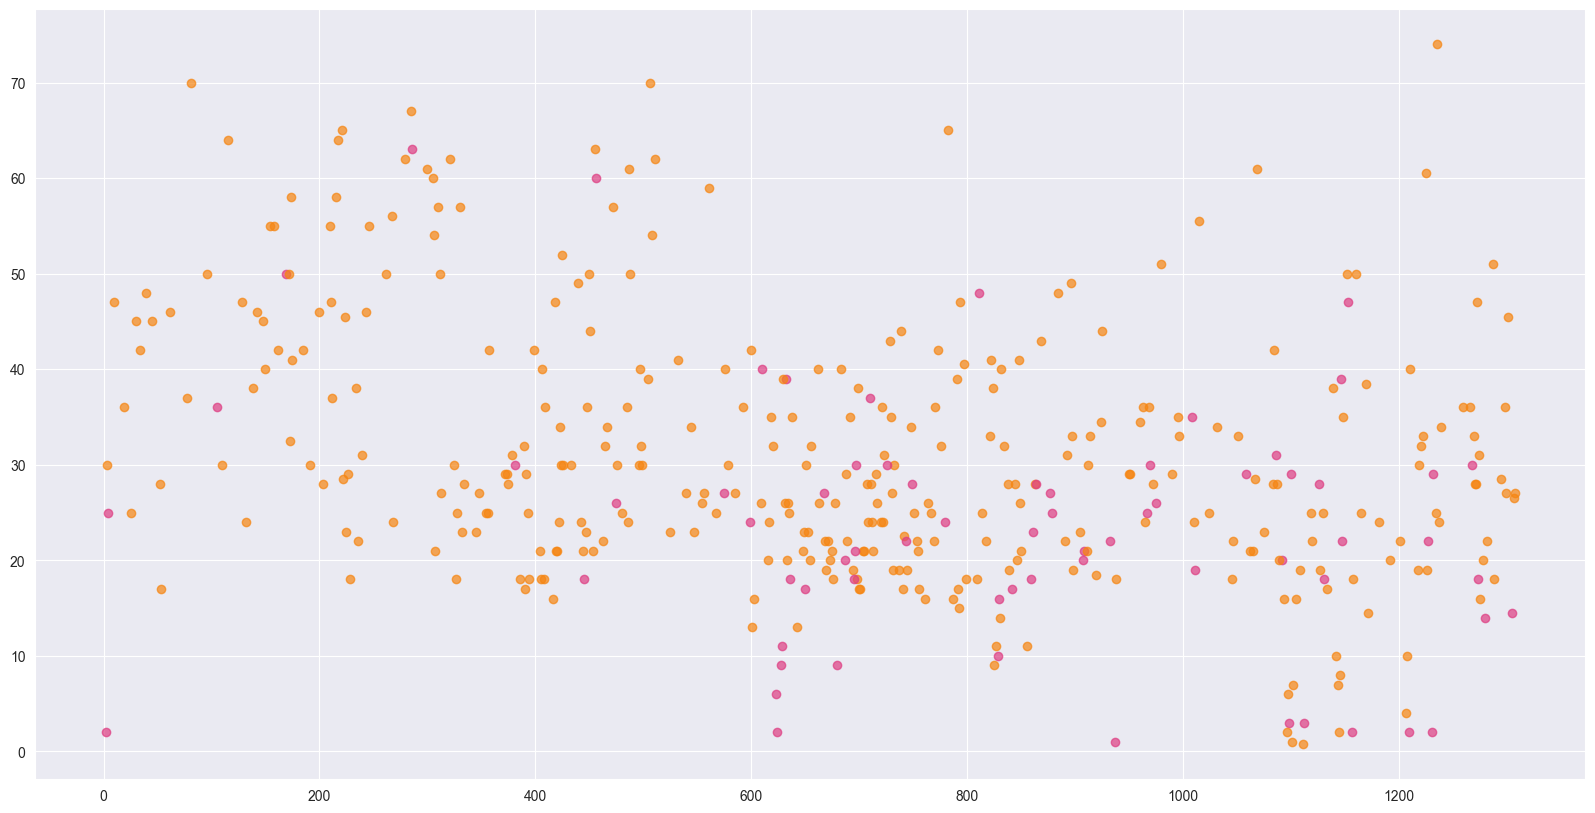

In [60]:
plt.figure(figsize=(20, 10))

for i in train_data['passenger_id'].loc[train_data['survived'] == 0]:
    gen = train_data['sex'].loc[train_data['passenger_id'] == i]
    # print(colDict[gen.values[0]])
    plt.scatter(i, train_data['age'].loc[train_data['passenger_id'] == i], color=colDict[gen.values[0]], alpha=0.7)

In [77]:
weightVals = [4.53, 0.53, 5.05]
heightVals = [2.19, 2.63, 4.41]

AttributeError: 'str' object has no attribute 'items'

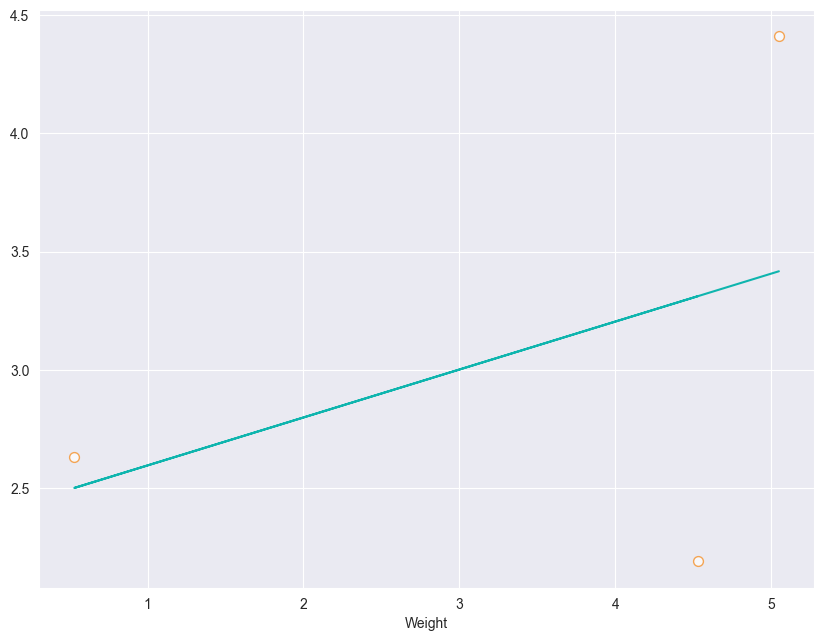

In [79]:
weight = np.array(weightVals)
height = 0.2027 * weight + 2.3935

plt.figure(figsize=(10, 7.5))

plt.plot(weight, height, color=colors[0])
plt.scatter(weightVals, heightVals, color='#fff', alpha=0.7, edgecolors=colors[2], s=50)

plt.xlabel("Weight", fontdict="IBM Plex Sans")
plt.ylabel("Height", fontdict="IBM Plex Sans")
plt.title("Actual Regression Line")

plt.show()

0.0007969893610000192

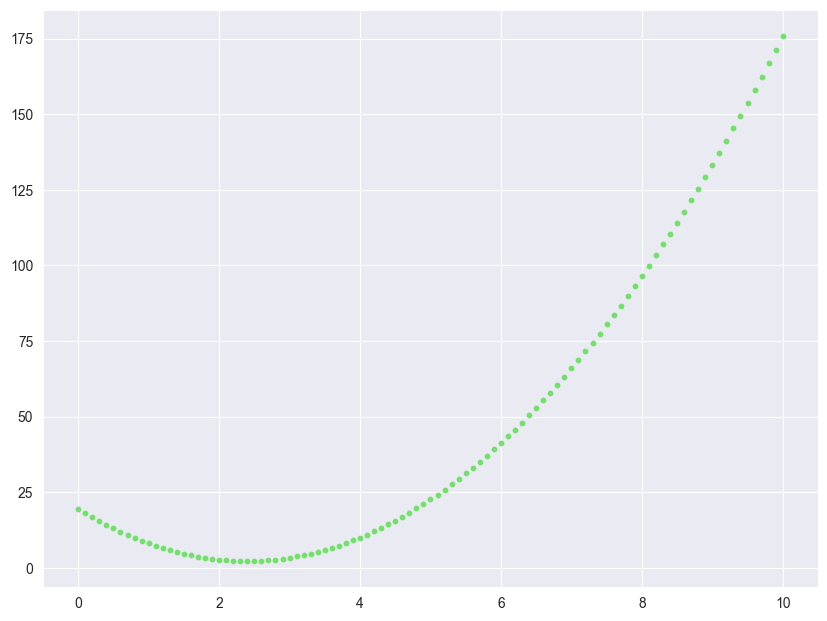

In [84]:
c = 0.0
plt.figure(figsize=(10, 7.5))
loss = []

while c <= 10:
    sumSquared = 0
    for i in range(3):
        predHeight = 0.2027 * weightVals[i] + c
        sumSquared += (heightVals[i] - predHeight) ** 2
        loss.append(sumSquared)
    plt.scatter(c, sumSquared, color=colors[5], s=10)
    c += 0.1

min(loss)